In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt

In [2]:
def read_json_to_df(path):
    with open(path, 'rt') as f:
        file = json.load(f)
    data = []
    metric_names = []
    is_init_metric_names = False
    for num_epochs in file.keys():
        for percent in file[num_epochs].keys():
            for learner in file[num_epochs][percent]:

                # loss = file[num_epochs][percent][learner]['loss']
                metrics = file[num_epochs][percent][learner]['test_metrics']
                metric_list = []
                for  metric in metrics:
                    # print(metric)
                    if not is_init_metric_names:
                        metric_names.append(metric['metric_alias'])
                    metric_list.append(metric['value'])
                row = [learner, num_epochs, percent] + metric_list
                data.append(row)
                is_init_metric_names = True
    return pd.DataFrame(data, columns=['learner', 'num_epochs', 'percent'] + metric_names)

In [3]:
df = read_json_to_df('output/bert-base-uncased.json')

In [4]:
df

,learner,num_epochs,percent,f1 weighted,f1 macro,f1 micro,accuracy
0,active,5,5,0.680099,0.552288,0.685917,0.685917
1,random,5,5,0.808312,0.717198,0.821447,0.821447
2,active,5,10,0.769555,0.643776,0.794315,0.794315
3,random,5,10,0.813752,0.732062,0.822610,0.822610
4,active,5,15,0.699173,0.653334,0.685271,0.685271
5,random,5,15,0.812425,0.738484,0.814212,0.814212
6,active,5,20,0.773005,0.708768,0.761499,0.761499
7,random,5,20,0.808109,0.722825,0.820284,0.820284
8,active,7,5,0.675121,0.617826,0.648837,0.648837
9,random,7,5,0.813899,0.731919,0.823127,0.823127


In [5]:
active = df[df['learner'] == 'active']

In [6]:
random = df[df['learner'] == 'random']

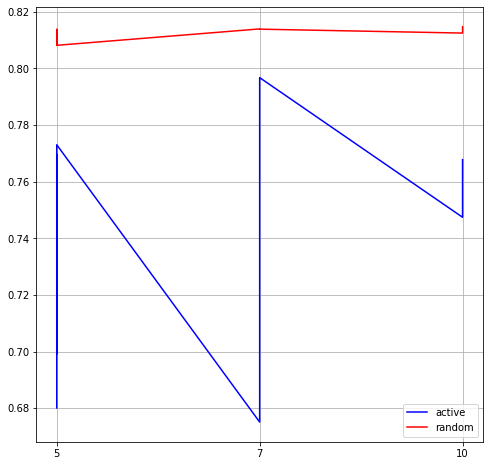

In [7]:
plt.figure(figsize=(8, 8))
plt.grid()
plt.plot(active['num_epochs'], active['f1 weighted'], label='active', color='b')
plt.plot(random['num_epochs'], random['f1 weighted'], label='random', color='r')
plt.legend()